In [68]:
import numpy as np
from numpy.linalg import matrix_power
import math
from scipy.sparse import csr_matrix
from scipy.linalg import hadamard
import matplotlib.pyplot as plt

Defining $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$, $\begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}$, $\begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}$, $\begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix}$ and $\begin{bmatrix} 0 & 0 \\ 0 & 1 \end{bmatrix}$

In [9]:
ket0 = np.array([1,0])
ket1 = np.array([0,1])
out00 = np.outer(ket0,ket0)
out01 = np.outer(ket0,ket1)
out10 = np.outer(ket1,ket0)
out11 = np.outer(ket1,ket1)

Defining the Shift Operator from the following equation: 
$S = \sum_{i} |i + 1⟩ ⟨i| \otimes |\uparrow ⟩ ⟨ \uparrow| + \sum_{i} |i - 1⟩ ⟨i| \otimes |\downarrow ⟩ ⟨ \downarrow|$  

In [21]:
def shift_OP(n, Hp):
    upshift = np.zeros(shape=(Hp,Hp)) #HpxHp matrix 
    for i in range(Hp):
        v1 = np.zeros(Hp) 
        v1[(i+1)%(Hp)] = 1 #|i + 1⟩ 
        v2 = np.zeros(Hp)
        v2[i] = 1 #⟨i|
        upshift += np.outer(v1,v2) #|i + 1⟩ ⟨i|

    up = np.kron(upshift,out00) 

    downshift = np.zeros(shape=(Hp,Hp)) #HpxHp matrix 
    for i in range(Hp):
        u1 = np.zeros(Hp)
        u1[(i-1)%Hp] = 1 #|i - 1⟩ 
        u2 = np.zeros(Hp)
        u2[i] = 1 #⟨i|
        downshift += np.outer(u1,u2) #|i - 1⟩ ⟨i|

    down = np.kron(downshift,out11) 
    return up + down

$U = S \cdot (I \otimes C)$

$\Psi_{f} = U^{t}  \Psi_i $

In [74]:
def walk(t, b):

    Hp = 2*t + 1 #Position Hilbert Space
    Hc = 2 #Coin Hilbert Space

    pos_0 = np.zeros(Hp)
    pos_0[t] = 1 #Central starting position

    state_i = np.kron(pos_0, b) #b = initial spin state

    C = np.kron(np.eye(Hp),hadamard(Hc)) #Coin = Hadamard

    U = np.dot(shift_OP(t, Hp),C)

    pos_f = matrix_power(U,t).dot(state_i)

    l = Hp-1//2
    ComPos = np.zeros(Hp)
    for i in range(Hp):
        ComPos[i] = abs(pos_f[2*i])**2 + abs(pos_f[2*i+1])**2 #probability of spin up + down in position i

    return ComPos

In [61]:
def norm(t, Hp, compos):
    norm = 0
    ComPos = compos 
    k = 2**(2*t)
    for i in range(Hp):
        norm += ComPos[i] / (np.sqrt(float(k))) #normalising
    print("norm = ", norm)

In [226]:
def plot(t, b, sf, getnorm, getpos):

    Hp = 2*t + 1

    xpos2 = np.zeros(Hp-t)
    compos2 = np.zeros(Hp-t)
    for i in range(0,Hp,2):
        xpos2[(i//2)] = i-t #every second position

    compos = walk(t, b)

    for i in range(0,Hp,2):
        j = i//2
        compos2[j] = compos[i] #every second position

    k = 2**(2*t) #normalising

    plt.plot(xpos2, (compos2) / (np.sqrt(float(k))))
    plt.xlabel("Position")
    plt.ylabel("Probability")
    plt.xlim([-t, t])
    plt.ylim(bottom = 0)
    plt.figtext(.82, .9, r"$t = {}$".format(t), fontsize = 'x-small')
    plt.figtext(0.15, 0.9, "Ψ0 = {}".format(b), fontsize = 'x-small')

    if getnorm == True:
        norm(t, Hp, compos) #display norm

    if sf == True:
        plt.savefig("QW.pdf") #save image

    if getpos == True:
        positions(t, Hp, compos) #display all positions


In [227]:
def positions(t, Hp, compos):
    ComPos = compos
    for i in range(Hp):
        print("Pos", i-t, "=", ComPos[i]) #print all positions

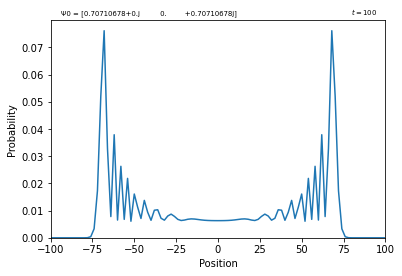

In [230]:
#plot(number of steps, intial spin state, save image, display norm, print all positions)

plot(100, (ket0 + ket1*1j) / np.sqrt(2), sf = False, getnorm = False, getpos = False)

#common initial states:
# (ket0 + ket1*1j) / np.sqrt(2)
# (np.sqrt(0.85)*ket0 - np.sqrt(0.15)*ket1)
# ket0
# ket1